# Linear Regression using Batch Gradient Descent

## Libraries and Settings

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
assert sklearn.__version__ >= "0.20"

# To make this notebook's output stable across runs
np.random.seed(42)

# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/Linear_Regression


# Linear regression Do-It-Yourself

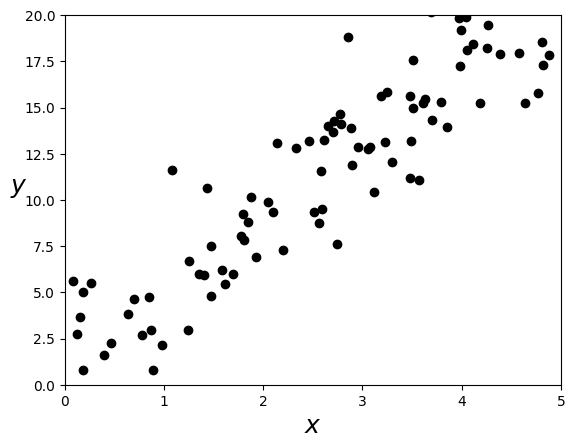

In [9]:
# generiert zufällige Daten für x und y und visualisiert sie in einem Streudiagramm
# np.random.rand(100, 1) erzeugt ein Array mit 100 Zufallswerten zwischen 0 und 1 in einer Spalte (Form 100x1).
# Die Werte werden dann mit 5 multipliziert, sodass die Werte in X nun zwischen 0 und 5 liegen.
# - Das Ergebnis ist eine Matrix mit 100 Zeilen und einer Spalte.

# Zielvariable y basierend auf einer linearen Funktion von x erstellt
# 1 + 4 * X legt eine lineare Beziehung zwischen x und y fest
#  - 1 der Achsenabschnitt (Intercept) 
#  - 4 Steigung der Geraden
X = 5 * np.random.rand(100, 1) 
y = 1 + 4 * X + 3*np.random.randn(100, 1)

# plt.scatter(X, y, color='black') erzeugt einen das Symbol als Punkte (bei x und y) und färbt sie schwarz
# rotation=0 sorgt dafür, dass die y-Beschriftung horizontal dargestellt wird.
# plt.axis([0, 5, 0, 20]) legt die Grenzen des Diagramms fest
# - x-Achse: Bereich von 0 bis 5
# - y-Achse: Bereich von 0 bis 20.
plt.scatter(X, y, color = 'black')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 5, 0, 20])
plt.show()

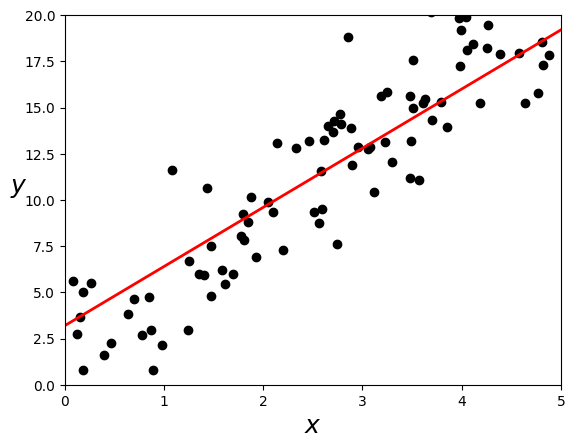

In [10]:
# Sample data - lineare Modellschätzung basierend auf einer "Vermutung" für die Parameter 01 (Achsenabschnitt) und 02 (Steigung)
# np.linspace(0, 5, 100) erzeugt 100 gleichmäßig verteilte Werte zwischen 0 und 5.
# Werte werden in x_new gespeichert und dienen als x-Werte, für die die hypothetische Gerade berechnet wird.
x_new = np.linspace(0, 5, 100)

# Make a guess for theta_0 and theta_1
# theta_0 und theta_1 sind die Vermutungen für die Parameter des Modells
# theta_0 ist der Achsenabschnitt: der y-Wert der Geraden, wenn x = 0 ist.
# theta_1 ist die Steigung: sie gibt an, wie stark sich y ändert, wenn x um 1 zunimmt.
# Diese Werte (3.2 und 3.2) sind Platzhalterwerte
theta_0 = 3.2 # Please make a better guess for theta_0
theta_1 = 3.2 # Please make a better guess for theta_1

# y_hyp enthält die berechneten y Wert auf Grundlage der Vermutungen für 00 und 01
y_hyp =  + theta_0 + theta_1 * x_new

# Plot data an guess of theta_1 & theta_0
# plt.scatter(X, y, color='black') erzeugt einen das Symbol als Punkte (bei x und y) und färbt sie schwarz
# plt.plot(x_new, y_hyp, color='red', lw=2) zeichnet die Hypothesen-Gerade basierend auf den Vermutungen für theta_0 und theta_1
# color='red' färbt die Gerade rot.
# lw=2 setzt die Linienbreite auf 2 für bessere Sichtbarkeit.
plt.scatter(X, y, color = 'black' )
plt.plot(x_new, y_hyp, color = 'red', lw = 2)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 5, 0, 20])
plt.show()


# Search for optimal values of theta_0 und theta_1 using batch gradient descent

In [4]:
# Learning rate
eta = 0.1

# Number of iterations
n_iterations = 1000

# Number of samples
N = 100

# Random initialization of theta_1 and theta_0
theta_1 = np.random.randn(1)
theta_0 = np.random.randn(1)

# Lists to store the values of theta_1 and theta_0 during the iterations
cum_theta1=[]
cum_theta0=[]

# Gradient Descent
for iteration in range(n_iterations):
    cum_theta0.append(theta_0)
    cum_theta1.append(theta_1)
    
    # Compute the gradients
    gradient_theta_0 = 1/N * np.sum((theta_1*X + theta_0 - y))
    gradient_theta_1 = 1/N * np.sum((theta_1*X + theta_0 - y)*X)

    # Update theta_0 and theta_1
    theta_0 = theta_0 - eta * gradient_theta_0
    theta_1 = theta_1 - eta * gradient_theta_1

# Plot the values of theta_1 and theta_0
print("theta_0: ", theta_0)
print("theta_1: ", theta_1)

theta_0:  [1.64528847]
theta_1:  [3.72413606]


## Plot the values of theta_1 and theta_0 for each iteration

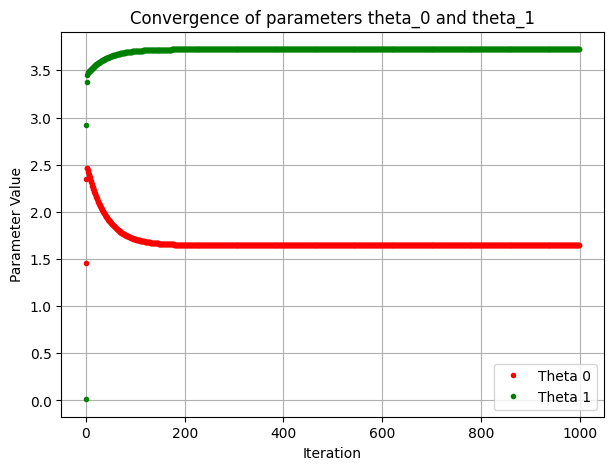

In [5]:
# Plot the values of theta_1 and theta_0
plt.figure(figsize=(7, 5))
plt.plot(cum_theta0, 'r.', label='Theta 0')
plt.plot(cum_theta1, 'g.', label='Theta 1')
plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('Convergence of parameters theta_0 and theta_1')
plt.legend()
plt.grid()
plt.show()

# Calculate values for theta_0 und theta_1 using linear regression

In [6]:
# Calculate values for theta_0 und theta_1 using linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Print values for theta_0 und theta_1
print("theta_0: ", lin_reg.intercept_)
print("theta_1: ", lin_reg.coef_)

theta_0:  [1.64528847]
theta_1:  [[3.72413606]]


## Performing a prediction using a linear regression model

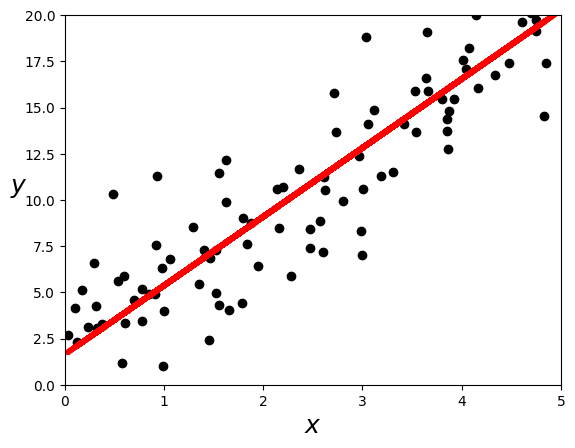

In [7]:
# Performing a prediction using a linear regression model
ypred_exact = lin_reg.coef_ * X + lin_reg.intercept_

# Plot the data and the prediction
plt.scatter(X, y, color = 'black' )
plt.plot(X, ypred_exact, color = 'red', lw = 4)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 5, 0, 20])
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [8]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-11-05 09:04:29
Python Version: 3.11.10
-----------------------------------
